인공신경망 예제
1수면시간 / 운동 시간 / 칼로리 섭취량 --> 벡터 2중간에 --> 함수 행렬 3체중 / 혈압 --> 벡터
1 -> 2 -> 3 시퀀스.

좋은 행렬을 구하는 것이 핵심. 화살표에 들어 가는 행렬 값에 아무거나 넣고, 사례 1번부터 입력을 넣고 예측. 예측값이 나올텐데 아무 숫자나 넣었으니 아무 출력값일 것. 당연히 정답과 차이가 난다.

수많은 사례들을 적용하여 행렬 값을 바꾸어보자.입력-출력 사이에 층위를 더할 수 도 있음. Intermediate 벡터를 n개 더 넣을 수 있다는 뜻.

인공지능의 대표선수 인공신경망. 어떤 입력을 출력으로 예측하는 함수. 입력과 출력은 벡터 함수는 행렬, 데이터만 있으면 행렬을 추측해낼 수 있음. 그 행렬이 인공지능.

# import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Dense = Fully connected
모든 그래프는 node(동그라미)와 edge(선)로 이루어진다. --> node와 node끼리의 connection.
edge는 화살표 형태인데, 이는 weight라고 함.

pandas는 엑셀 같은 파일 불러올 때 필요한 모듈.
numpy는 파이썬 상에서 처리를 하기 위한 함수
tensorflow는 인공지능 처리와 관련된 필수적인 요소.

# data preparation and visualization

In [2]:
data = pd.read_csv('regression.csv')
data

,X,Y
0,3.300,1.700
1,4.400,2.760
2,5.500,2.090
3,6.710,3.190
4,6.930,1.694
5,4.168,1.573
6,9.779,3.366
7,6.182,2.596
8,7.590,2.530
9,2.167,1.221


regression은 continuous한 값에서 continuous한 값으로.
classification은 continuous한 값에서 discrete한 값으로.
ex. 커피 마시는 수와 수면 시간은? --> regression. 숫자에서 숫자니까.
ex. 운동 시간과 수명? --> regression.
ex. 사진을 보고 나서 여자인지 남자인지? --> classification. discrete하게 남자 여자 둘밖에 없으니까.

regression은 linear하게 가면 됨. 하지만 classification은 linear하면 안 되고 non linear한 것을 추가해야 함.

위의 예시는 전형적인 regression의 예.

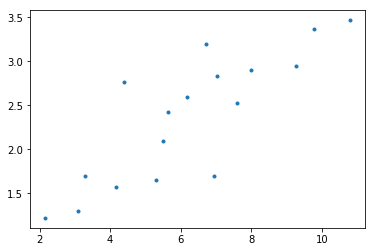

In [4]:
data = pd.read_csv('regression.csv')
X = data['X']
Y = data['Y']
plt.plot(X, Y, '.')

# create model

In [7]:
model = Sequential()
model.add(Dense(10, input_shape=[1]))
model.add(Dense(3))
model.add(Dense(6))
model.add(Dense(1), activation = 'sigmoid')
model.compile(optimizer="rmsprop", loss='mse')

TypeError: add() got an unexpected keyword argument 'activation'

sequential인 이유는 화살표가 단방향으로 가기 때문에.
dense를 input shape에 넣어줌. 앞의 1은 출력 동그라미 개수, 뒤의 1은 입력의 개수 --> 입력 2개.

Hidden layer를 넣는 방법은 3-5줄처럼. 우리 데이터의 맨 마지막은 입1, 출1이기 때문에 1이어야 함. 그래서 다섯번째 줄이 1
sigmoid는 non linearity를 주는 방법. sigmoid 말고도 많이 있음

만약 sigmoid 자리에 linear쓰면 그건 linear하게 만든다는 뜻인데, 어차피 linear한 정보이기 때문에 안하는 거나 다름 없음.

# train model

In [9]:
model.fit(X, Y)

17/17 [==============================] - 0s 892us/sample - loss: 0.3750


# model prediction

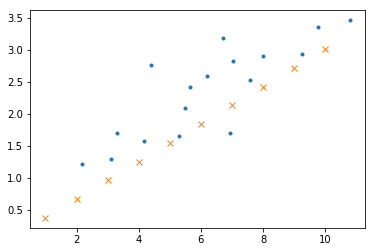

In [7]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = model.predict(x)
plt.plot(X, Y, '.')
plt.plot(x,y, 'x')
plt.show()

# what are a and b in y = ax + b?

In [8]:
weights = model.layers[0].get_weights()
print(weights)

[array([[0.293356]], dtype=float32), array([0.07893654], dtype=float32)]



--> 인공신경망 = 함수

값이 두 개가 나옴.
--> 첫번째가 a값 /// 두번째가 y절편 값(b) --> 상당히 b에 가깝다

스파이더 웹 하나가 layer.
--> 스파이더 웹이 1개 밖에 없으니 0을 써준 것 (웹이 두개면 다르게 써야 함)

만약 x의 값이 두개면? x1 x2 면?
--> 화살표 개수가 3개 --> a, b, c 3개의 값을 찾아야 함. (입력은 2개, 밑의 상수 1은 정해져 있음 & 출력은 y로 정해져 있음)

출력값,입력값은 자유롭게 변경 가능 (csv에 들어가서 셀 파일을 수정)

입력 3개 출력 2개라면? 추정해야 되는 parameter의 개수는?

쓸 데이터를 만들고 입력 구조와 출력 구조에 대해 생각. 입력 개수와 출력 개수를 통해 그림을 그리고 그것을 구현을 하는 것.